In [ ]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json


--2021-11-13 13:26:51--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.197.128, 64.233.191.128, 173.194.192.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.08s   

2021-11-13 13:26:51 (63.4 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [ ]:
sentences

["former versace store clerk sues over secret 'black code' for minority shoppers",
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
 "mom starting to fear son's web series closest thing she will have to grandchild",
 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
 'j.k. rowling wishes snape happy birthday in the most magical way',
 "advancing the world's women",
 'the fascinating case for eating lab-grown meat',
 'this ceo will send your kids to school, if you work for his company',
 'top snake handler leaves sinking huckabee campaign',
 "friday's morning email: inside trump's presser for the ages",
 'airline passengers tackle man who rushes cockpit in bomb threat',
 'facebook reportedly working on healthcare features and apps',
 "north korea praises trump and urges us voters to reject 'dull hillary'",
 "actually, cnn's jeffrey lord has been 'indefensible' for a while",
 'barcelona holds huge protest in su

In [ ]:
labels

[0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,


In [ ]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
training_sequences

[[328, 1, 799, 3405, 2404, 47, 389, 2214, 1, 6, 2614, 8863],
 [4, 6840, 3096, 3097, 23, 2, 161, 1, 390, 2842, 6, 251, 9, 889],
 [153, 890, 2, 891, 1445, 2215, 595, 5650, 221, 133, 36, 45, 2, 8864],
 [1252, 38, 213, 382, 2, 1572, 29, 288, 23, 10, 2405, 1446, 5651, 958],
 [715, 672, 5652, 1043, 8865, 662, 553, 5, 4, 92, 1253, 90],
 [8866, 4, 366, 70],
 [4, 6841, 369, 6, 498, 3406, 1875, 1378],
 [20, 563, 36, 1091, 31, 163, 2, 103, 87, 18, 150, 6, 33, 343],
 [278, 3407, 6842, 447, 8867, 2092, 148],
 [2093, 300, 335, 370, 63, 1, 6, 4, 4264],
 [3098, 2216, 3756, 14, 37, 5653, 8868, 5, 2094, 1092],
 [309, 767, 428, 8, 1663, 1664, 9, 3099],
 [226, 477, 2843, 13, 9, 922, 239, 371, 2, 4265, 1, 6843],
 [235, 5654, 8869, 3757, 39, 240, 1, 6, 7, 174],
 [1, 1379, 800, 663, 5, 336, 3, 959],
 [524, 2094, 8870, 126, 8871, 6, 8872, 3758, 1665],
 [2095,
  1328,
  341,
  46,
  3408,
  323,
  288,
  960,
  2,
  22,
  1,
  19,
  1044,
  359,
  109,
  1447],
 [1666, 6844, 3100, 8873, 19, 5655, 1200],
 [8874

In [ ]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.6497 - accuracy: 0.6043 - val_loss: 0.5297 - val_accuracy: 0.7857 - 3s/epoch - 5ms/step
Epoch 2/30
625/625 - 2s - loss: 0.4039 - accuracy: 0.8432 - val_loss: 0.3797 - val_accuracy: 0.8386 - 2s/epoch - 3ms/step
Epoch 3/30
625/625 - 2s - loss: 0.3000 - accuracy: 0.8820 - val_loss: 0.3508 - val_accuracy: 0.8536 - 2s/epoch - 3ms/step
Epoch 4/30
625/625 - 2s - loss: 0.2484 - accuracy: 0.9039 - val_loss: 0.3437 - val_accuracy: 0.8556 - 2s/epoch - 3ms/step
Epoch 5/30
625/625 - 2s - loss: 0.2136 - accuracy: 0.9176 - val_loss: 0.3592 - val_accuracy: 0.8509 - 2s/epoch - 3ms/step
Epoch 6/30
625/625 - 2s - loss: 0.1851 - accuracy: 0.9302 - val_loss: 0.3719 - val_accuracy: 0.8457 - 2s/epoch - 3ms/step
Epoch 7/30
625/625 - 2s - loss: 0.1650 - accuracy: 0.9387 - val_loss: 0.3735 - val_accuracy: 0.8520 - 2s/epoch - 4ms/step
Epoch 8/30
625/625 - 2s - loss: 0.1471 - accuracy: 0.9459 - val_loss: 0.3952 - val_accuracy: 0.8506 - 2s/epoch - 3ms/step
Epoch 9/30
625/625 - 2s 

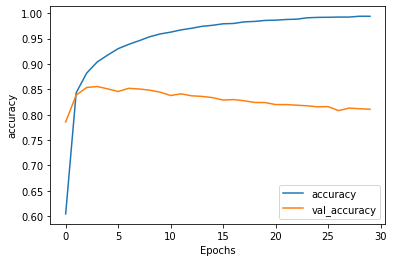

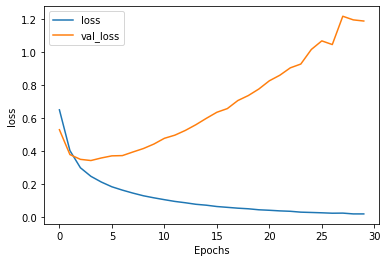

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[1])
print(labels[1])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
the 'roseanne' revival catches up to our thorny political mood, for better and worse
0


In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [ ]:
'''import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
'''try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [ ]:
sentence = ["to read or not to read, part 2"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[1.2878195e-06]]
